### Сборный проект. Анализ рынка компьютерных игр

<b>Цель проекта:</b> выявить определяющие успешность игры закономерности

<b>Исходные данные:</b>

  - Name — название игры
  - Platform — платформа
  - Year_of_Release — год выпуска
  - Genre — жанр игры
  - NA_sales — продажи в Северной Америке (миллионы проданных копий)
  - EU_sales — продажи в Европе (миллионы проданных копий)
  - JP_sales — продажи в Японии (миллионы проданных копий)
  - Other_sales — продажи в других странах (миллионы проданных копий)
  - Critic_Score — оценка критиков (максимум 100)
  - User_Score — оценка пользователей (максимум 10)
  - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_games=pd.read_csv('desktop/datasets/games.csv')

In [3]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
pd.DataFrame(round((data_games.isna().mean()*100),2)).style.background_gradient('ocean') 

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


In [7]:
data_games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

не наблюдается "странных" значений, присутствуют пропуски

In [8]:
data_games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
data_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [10]:
data_games['NA_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

In [11]:
data_games['EU_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

In [12]:
data_games['JP_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

In [13]:
data_games['Other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

In [14]:
data_games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

нулевых значений нет, "странных" тоже, есть пропуски

In [15]:
data_games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

есть нулевые значения! есть пропуски, есть значение tbd

по мнению google TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Иными словами это те же пропуски.

In [16]:
data_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

есть пропуски, так же после изучения Википедии, было установлено, что эти рейтинги:

- E - Everyone - для всех, для детей от 6 лет.
- T - Teen - игры для подростков старше 13 лет.
- M - Mature - игры для подростков, старше 17 лет.
- E10+ - Everyone 10 and older - для всех, старше 10 лет.
- EC - Early Childhood - для детей от 3 лет.
- RP - Rating Pending - рейтинг еще не присвоен, зачастую это игры добавленные сразу после презентации.
- K-A - Kids to Adult - аналог E, которым K-A был заменен.
- AO - Adults Only 18+ - только для взрослых, старше 18 лет.


Таким образом K-A это старая версия E

In [17]:
data_games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

<b>Вывод:</b> 

В целом, в данных отсуствуют "странные" значения, но присутствуют нулевые и пропущенные.

Необходимо выполнить следующие операции:
 - привести строковые данные к нижнему регистру;
 - заменить типы данных (Year_of_Release   - к datetime, User_Score - к float, после обработки пропусков 'tbd');
 - выбрать стратегию обработки пропусков (столбцы Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating).

### Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

- Обработайте пропуски при необходимости:

- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

- Опишите причины, которые могли привести к пропускам;

- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Замена названий столбцов (приведение к нижнему регистру)

In [18]:
#замена регистра столбцов
data_games.columns = data_games.columns.str.lower()
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Преобразование данных в нужные типы с описанием и замена пропусков

In [19]:
#обработаем столбец с датой

#заменим пропуски в столбце значением 2222, чтобы его можно было затем определить
data_games['year_of_release'] = data_games['year_of_release'].fillna(2222)

#для начала, сделаем его строкой
data_games['year_of_release'] = data_games['year_of_release'].astype('int')

#посмотрим что получилось
data_games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 2222, 1995,
       1991, 1981, 1987, 1980, 1983])

In [20]:
#обработаем столбец с user_score
#для начала заменим tbd на -1 и nan на -1 (на 0 нельзя, такая оценка есть!)

data_games['user_score'] = data_games['user_score'].replace('tbd', -1)
data_games['user_score']=data_games['user_score'].fillna(value=-1).astype('float')

#проверка замены
data_games['user_score'].value_counts()

-1.0    9125
 7.8     324
 8.0     290
 8.2     282
 8.3     254
        ... 
 1.5       2
 0.3       2
 1.1       2
 0.0       1
 9.7       1
Name: user_score, Length: 96, dtype: int64

нецелесообразно заменять пропуски средним или частым значением, пропуском больше 10%, чтобы видеть, что значение пропущено оставляем -1 (на 0 нельзя, нулевое значение уже есть)

In [21]:
#обработаем пропуски в графах name, rating и genre
data_games['name']=data_games['name'].fillna(value='no name')
data_games['rating']=data_games['rating'].fillna(value='no raiting')
data_games['genre']=data_games['genre'].fillna(value='no genre')

#замена рейтинга старого образца на новый
data_games['rating']=data_games['rating'].replace('K-A', 'E')

In [22]:
#обработаем пропуски в графе critic_score
data_games['critic_score']=data_games['critic_score'].fillna(value=0)

In [23]:
#посмотрим что у нас 
data_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [24]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [25]:
data_games['name']=data_games['name'].str.lower()
data_games['platform']=data_games['platform'].str.lower() 
data_games['genre']=data_games['genre'].str.lower() 
data_games['rating']=data_games['rating'].str.lower() 

In [26]:
data_games.duplicated().sum()

0

Дубликатов нет)

#### Суммарные продажи во всех регионах 

In [27]:
data_games['total_sales']=data_games['na_sales']+data_games['eu_sales']+data_games['jp_sales']+data_games['other_sales']
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,-1.0,no raiting,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,-1.0,no raiting,31.38


<b>Вывод: </b>

заменены типы данных в следующих столбцах:
 - year_of_release --> на int:
 - user_score ---> на float

произведены замены:
 - в name, genre, rating ---> 'no name','no genre','no raiting': все эти столбцы категориальные, чтобы "видеть" пропуски и исключать из анализа, лучше их заменить, пропусков достаточно много, заменять их на самое популярное значение или что-то еще нельзя, это приведет к искажению результатов анализа;
 
 - в critic_score замена на 0, такого значения нет в уникальных значениях, тип данных float, заменять пропуска на среднее значение или что-то еще нельзя, это приведет к искажению результатов анализа;
 
 - в user_score замена на -1, так как на 0 нельзя, нулевое значение есть в уникальных;
 
 - year_of_release замена пропусков и tbd, который означает отсутсвие на данный момент решения по вопросу (=по факту отсуствие данных) на 2222, для того, чтобы можно было перевести в int и затем видеть их в анализе, исключать и процессе.
 
причины пропусков:
- ошибки ввода,
- неизвестные причины.

подсчитаны и добавлены в таблицу данные по суммарным продажам по всем регионам.

### Шаг 3. Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [28]:
#исключим данных, в которых не было года
data_per_year = data_games.query('year_of_release != 2222')

#сводная таблица
data_per_year=data_per_year.pivot_table(index='year_of_release',values='total_sales',aggfunc='count')
data_per_year.columns = ['count']

#посмотрим последние годы
data_per_year.head(5)

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


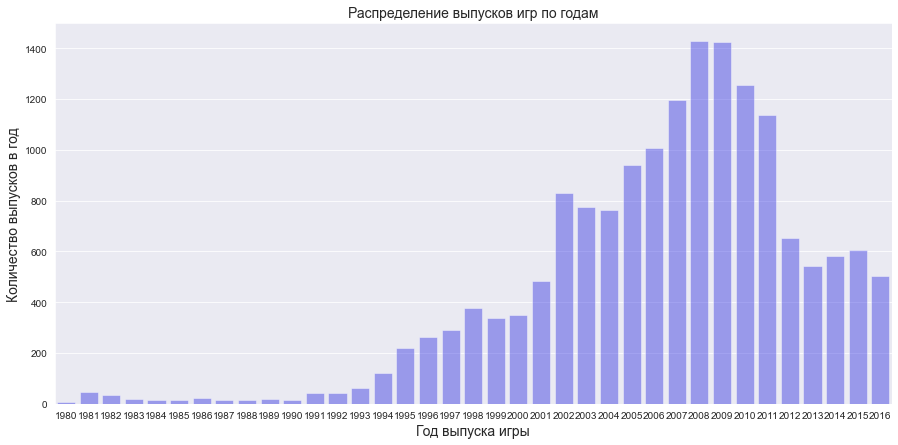

In [29]:
#построим гистограмму и посмотрим на ней на распределение по годам
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))

sns.barplot(x=data_per_year.index, y='count', data=data_per_year, color='blue',alpha=0.4)
plt.xlabel('Год выпуска игры', fontsize=14)
plt.ylabel('Количество выпусков в год', fontsize=14)
plt.title('Распределение выпусков игр по годам', fontsize=14)

plt.show()
 

<b>Вывод:</b> Видим, что выпускаться игры начали в 1980, но до 1991 их было очень мало, эти годы можно не учитывать. Будем брать для анализа период с 1991 по 2016 год.

#### Посмотрите, как менялись продажи по платформам. 

In [30]:
#таблица с актуальным периодом
games_good_time=data_games.query('year_of_release !=2222 and year_of_release >= 1991')

In [31]:
#выделим данные по актуальному периоду, исключив замененные нулевые значения
data_games_platform=data_games.query('year_of_release !=2222 and year_of_release >1991')

#сведем данные по платформам и отсортируем
platform_sales=data_games_platform.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

platform_sales.head()

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.76


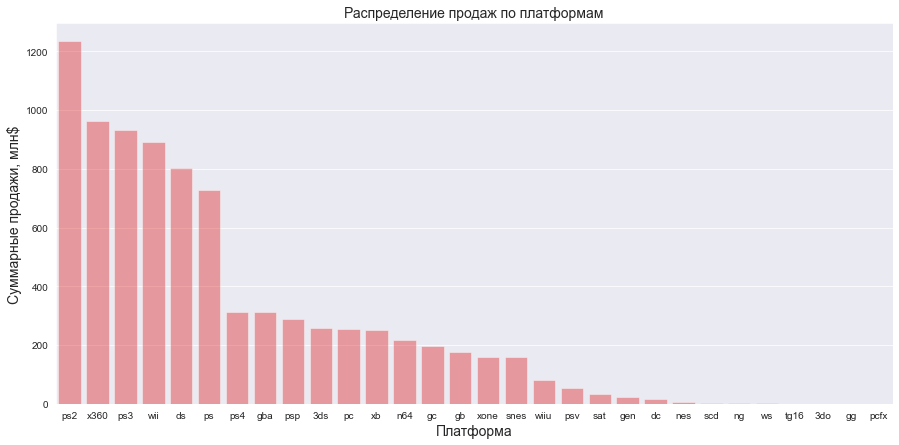

In [32]:
#посмотрим на распределение продаж по платформам по продажам

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))


sns.barplot(x=platform_sales.index, y='total_sales', data=platform_sales, color='red',alpha=0.4)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Суммарные продажи, млн$', fontsize=14)
plt.title('Распределение продаж по платформам', fontsize=14)

plt.show()

<b>Вывод:</b> По гистограмме видно, что с приличным отрывом лидируют 6 платформ: ps2,x360,ps3,wii,ds,ps.

#### Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам

In [33]:
#выделение популярных платформ
data_platform_top=data_games_platform[(data_games_platform['platform']=='ps2') | (data_games_platform['platform']=='x360') | (data_games_platform['platform']=='ps3') | (data_games_platform['platform']=='wii') | (data_games_platform['platform']=='ds') | (data_games_platform['platform']=='ps')]

#оставим необходимые столбцы
data_platform_top=data_platform_top[['name','platform','year_of_release','total_sales']]
data_platform_top.head()

,name,platform,year_of_release,total_sales
0,wii sports,wii,2006,82.54
2,mario kart wii,wii,2008,35.52
3,wii sports resort,wii,2009,32.77
6,new super mario bros.,ds,2006,29.80
7,wii play,wii,2006,28.91


In [34]:
#выделим название платформ в список
platform_list=data_platform_top['platform'].unique().tolist()
platform_list

['wii', 'ds', 'x360', 'ps3', 'ps2', 'ps']

In [35]:
#построим графики для топ-6 платформ
#сделаем сводную таблицу
top_platform_plot=data_platform_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

#в некоторых годах продаж не было,заменим 0
top_platform_plot=top_platform_plot.fillna(value=0)
top_platform_plot.head()

platform,ds,ps,ps2,ps3,wii,x360
year_of_release,,,,,,
1994,0.0,6.03,0.0,0.0,0.0,0.0
1995,0.0,35.96,0.0,0.0,0.0,0.0
1996,0.0,94.70,0.0,0.0,0.0,0.0
1997,0.0,136.17,0.0,0.0,0.0,0.0
1998,0.0,169.49,0.0,0.0,0.0,0.0


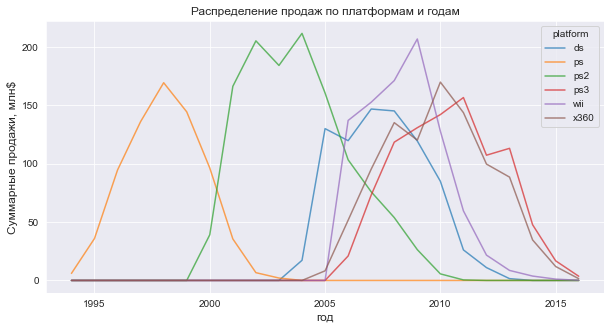

In [36]:
#построим графики

sns.set_style('darkgrid')


top_platform_plot.plot(alpha=0.7,figsize=(10,5))
plt.xlabel('год', fontsize=12)
plt.ylabel('Суммарные продажи, млн$', fontsize=12)
plt.title('Распределение продаж по платформам и годам', fontsize=12)

plt.show()

<b>Вывод:</b> Из графиков видно, что при выходе новой версии платформы, продажи на старую стремительно падают. К примеру это видно по цепочке PS-> PS2-> PS3

#### За какой характерный срок появляются новые и исчезают старые платформы?

In [37]:
#автоматизируем вычисление срока существования платформы из топ-6

year_list=[]
min_max=0

#обойдем циклом все платформы ТОП-6 и посмотрим для них разницу между самым ранним годом релиза и самым поздним
for element in  ('wii', 'ds', 'x360', 'ps3', 'ps2', 'ps'):
    platform_plot=data_platform_top[(data_platform_top['platform']==element)]
    min_max=(platform_plot['year_of_release'].max())-(platform_plot['year_of_release'].min())
    year_list.append(min_max) 

year_list   
    

[10, 9, 11, 10, 11, 9]

Видим, что топовые платформы существуют около 10 лет. Посмотрим что с жизненным циклом у всех остальных платформ.

In [38]:
#извлечем все платформы из исходного датасета в список:
total_platform=data_games['platform'].unique().tolist()
print(total_platform)

['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba', 'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone', 'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16', '3do', 'gg', 'pcfx']


In [39]:
#посчитаем жизненный цикл

year_list_total=[]
min_max_total=0

#вычислим разницу в самом раннем году релиза и самым поздним

for element in ('wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba', 'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone', 'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16', '3do', 'gg', 'pcfx'):
    
    platform_plot_total = games_good_time[(games_good_time['platform']==element)] 
    min_max_total=(platform_plot_total['year_of_release'].max())-(platform_plot_total['year_of_release'].min())
    year_list_total.append(min_max_total) 

#для удобства анализа создадим dataframe    
year_list_total=pd.DataFrame(year_list_total)
year_list_total.columns=['period']
year_list_total=year_list_total.fillna(value=0)

#посмотрим распределение
year_list_total.describe()

,period
count,31.000000
mean,6.064516
std,5.006233
min,0.000000
25%,3.000000
50%,5.000000
75%,9.500000
max,24.000000


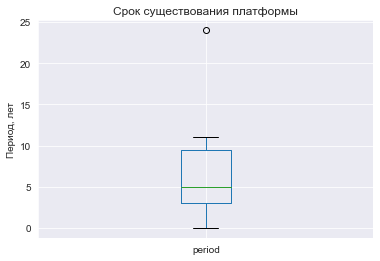

In [40]:
#посмотрим на гистограмме
year_list_total.boxplot()
plt.title('Срок существования платформы')
plt.ylabel('Период, лет')
plt.show()

<b>Вывод:</b> Жизненный цикл по всем платформам от 3 до 10 лет, в среднем это 5 лет. ТОПовые платформы существуют около 10 лет. 

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Актуальным можно считать период с 2011 по 2016 год. Период 5 лет выбран в связи со средней величиной жизненного цикла платформ. Посмотрим что происходит с платформами за период с 2011 по 2016 год.

In [41]:
#создадим таблицу с актуальным периодом
data_actualy=games_good_time.query('year_of_release>=2011 and year_of_release<=2016')

#сделаем сводную таблицу для актульного периода по платформам
data_actualy=data_actualy.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

#в некоторых годах продаж не было,заменим 0
data_actualy=data_actualy.fillna(value=0)

data_actualy.head()

platform,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
2012,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


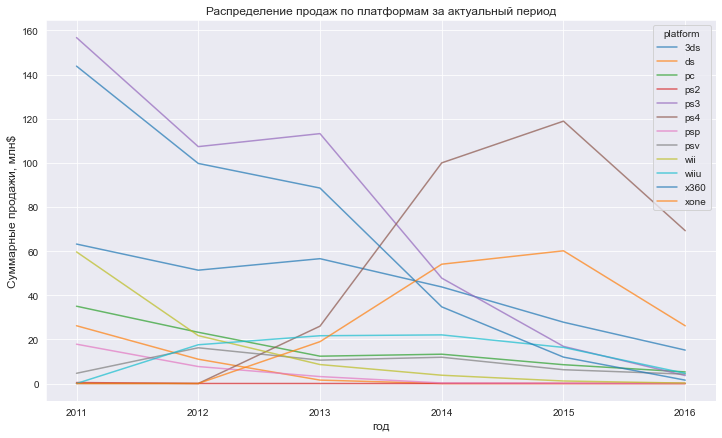

In [42]:
#построим графики за актуальный период

sns.set_style('darkgrid')


data_actualy.plot(alpha=0.7,figsize=(12,7))

plt.xlabel('год', fontsize=12)
plt.ylabel('Суммарные продажи, млн$', fontsize=12)
plt.title('Распределение продаж по платформам за актуальный период', fontsize=12)

plt.show()

<b>Вывод:</b> Известно что, данные за 2016г неполные. Таким образом посмотрим, что происходило на конец 2015-го. Видим платформы, которые находятся в фазе спада, это: <b>X360,3DS,PS3</b>, есть несколько платформ, которые росли на конец 2015: <b> PS4, XOne</b>. Есть в целом слабо успешные платформы. Например PSV.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

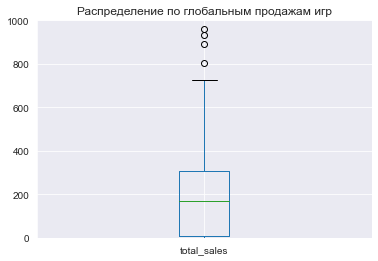

In [43]:
#посмотрим на общую картину продаж
sns.set_style('darkgrid')
plt.ylim(0,1000)
plt.title('Распределение по глобальным продажам игр')
platform_sales.boxplot()
plt.show()

In [44]:
platform_sales.describe()

,total_sales
count,30.000000
mean,278.623667
std,352.688854
min,0.030000
25%,8.262500
50%,168.445000
75%,307.042500
max,1233.560000


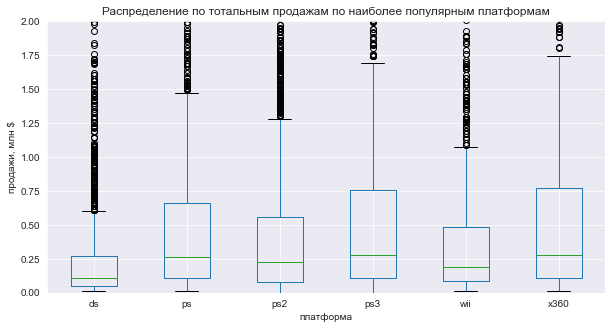

In [45]:
#построим "ящик с усами" для топ-6 платформ

fig,ax = plt.subplots(figsize=(10,5))
sns.set_style('darkgrid')

data_platform_top.query('platform == @platform_list').pivot_table(index='name', values='total_sales',columns='platform').boxplot(ax=ax, grid=True)

ax.set_ylim(0,2)

plt.title('Распределение по тотальным продажам по наиболее популярным платформам')
plt.xlabel('платформа')
plt.ylabel('продажи, млн $')
plt.show()

In [46]:
#посмотрим описательную статистику
data_platform_top.query('platform == @platform_list').pivot_table(index='name', values='total_sales',columns='platform').describe()


platform,ds,ps,ps2,ps3,wii,x360
count,2120.000000,1190.000000,2127.000000,1305.000000,1286.000000,1231.000000
mean,0.378660,0.611412,0.579953,0.712686,0.692986,0.779720
std,1.436359,1.056807,1.138461,1.402625,3.165022,1.632676
min,0.010000,0.010000,0.000000,0.000000,0.010000,0.010000
25%,0.050000,0.110000,0.080000,0.110000,0.090000,0.110000
50%,0.110000,0.260000,0.230000,0.280000,0.190000,0.280000
75%,0.270000,0.660000,0.560000,0.760000,0.487500,0.770000
max,29.800000,10.950000,20.810000,21.050000,82.540000,21.820000


<b>Вывод:</b> Оценивая боксплоты и распределения, можно сказать, что самые прибыльные это <b>ps3</b> и <b>x360</b>, их медиана и верхний квартиль выше, чем у всех остальных. НА втором месте <b>PS</b>. В целом очевидно, что в ТОП-6 присутсвуют платформы серии PS.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Пусть топовая платформа - ps2

<b>Степени корреляции</b> 
- от <b>0 до 0,3 </b> -> очень слабая
- от <b>0,3 до 0,5</b> ->	слабая
- от <b>0,5 до 0,7</b> ->	средняя
- от <b>0,7 до 0,9</b> -> 	высокая
- от <b>0,9 до 1</b> ->	очень высокая

In [47]:
#выделим данные по платформе ps2, исключив значения, которые были заменены в графах user_score и critic_score

ps2_data=games_good_time[(games_good_time['platform']=='ps2') & (games_good_time['critic_score']!=-1) & (games_good_time['critic_score']!=0) & (games_good_time['user_score']!=-1)]

ps2_data=ps2_data[['critic_score','user_score','na_sales','eu_sales','jp_sales','total_sales']]

In [48]:
#посчитаем корреляцию
ps2_data.corr().style.background_gradient('ocean') 

,critic_score,user_score,na_sales,eu_sales,jp_sales,total_sales
critic_score,1.000000,0.565841,0.390233,0.291779,0.214256,0.386415
user_score,0.565841,1.000000,0.169334,0.124795,0.147916,0.171690
na_sales,0.390233,0.169334,1.000000,0.655312,0.261896,0.927369
eu_sales,0.291779,0.124795,0.655312,1.000000,0.283266,0.766618
jp_sales,0.214256,0.147916,0.261896,0.283266,1.000000,0.452669
total_sales,0.386415,0.171690,0.927369,0.766618,0.452669,1.000000


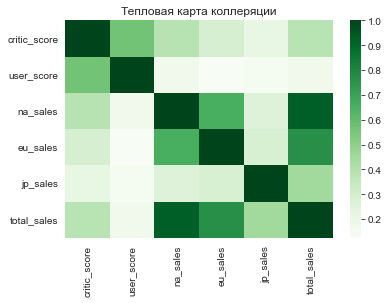

In [49]:
#тепловая карта корреляции
sns.heatmap(ps2_data.corr(),cmap='Greens')
plt.title('Тепловая карта коллеряции')
plt.show()

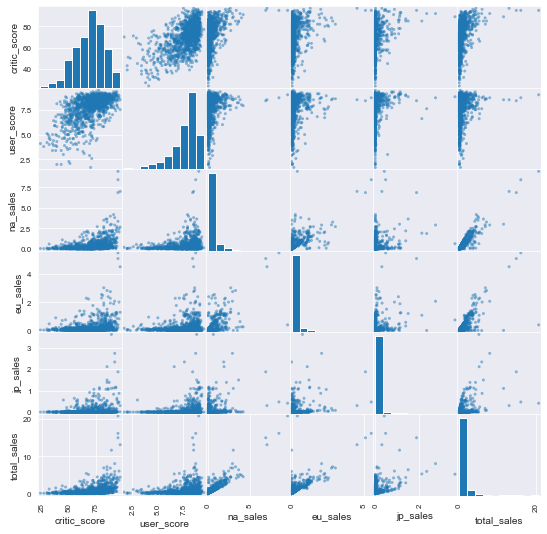

In [50]:
#посмотрим на матрице диаграмм рассеяния
pd.plotting.scatter_matrix(ps2_data,figsize=(9,9));

<b>Вывод:</b> 

МЫ посмотрели платформу PS2. 
Между оценкой критиков и продажами есть зависимость (слабая положительная – 0.39), причем наиболее подвержены влиянию мнения критиков в Северной Америке, наименее – в Японии (не мудрено – менталитет у японцев особый). Слабая положительная (0.17) зависимость между продажами и оценкой пользователей, причем американские пользователи опять лидируют в зависимости от оценки, на втором месте Япония и наименее подвержены отзывам в Европе.

#### Соотнесите выводы с продажами игр на других платформах.

In [51]:
#посмотрим корреляцию по остальным топовым платформам (x360,ps3,wii,ds,ps) по суммарным продажам

#x360
x360_data=games_good_time[(games_good_time['platform']=='x360') & (games_good_time['critic_score']!=-1) & (games_good_time['critic_score']!=0) & (games_good_time['user_score']!=-1)]
x360_data=x360_data[['critic_score','user_score','na_sales','eu_sales','jp_sales','total_sales']]

#ps3
ps3_data=games_good_time[(games_good_time['platform']=='ps3') & (games_good_time['critic_score']!=-1) & (games_good_time['critic_score']!=0) & (games_good_time['user_score']!=-1)]
ps3_data=ps3_data[['critic_score','user_score','na_sales','eu_sales','jp_sales','total_sales']]

#wii
wii_data=games_good_time[(games_good_time['platform']=='wii') & (games_good_time['critic_score']!=-1) & (games_good_time['critic_score']!=0) & (games_good_time['user_score']!=-1)]
wii_data=wii_data[['critic_score','user_score','na_sales','eu_sales','jp_sales','total_sales']]

#ds
ds_data=games_good_time[(games_good_time['platform']=='ds') & (games_good_time['critic_score']!=-1) & (games_good_time['critic_score']!=0) & (games_good_time['user_score']!=-1)]
ds_data=ds_data[['critic_score','user_score','na_sales','eu_sales','jp_sales','total_sales']]

#ps
ps_data=games_good_time[(games_good_time['platform']=='ps') & (games_good_time['critic_score']!=-1) & (games_good_time['critic_score']!=0) & (games_good_time['user_score']!=-1)]
ps_data=ps_data[['critic_score','user_score','na_sales','eu_sales','jp_sales','total_sales']]


In [52]:
#корреляция
x360_data.corr().style.background_gradient('ocean') 
 

,critic_score,user_score,na_sales,eu_sales,jp_sales,total_sales
critic_score,1.000000,0.625020,0.373209,0.380524,0.279094,0.388992
user_score,0.625020,1.000000,0.102680,0.107795,0.172285,0.110280
na_sales,0.373209,0.102680,1.000000,0.867076,0.516617,0.986051
eu_sales,0.380524,0.107795,0.867076,1.000000,0.496487,0.937464
jp_sales,0.279094,0.172285,0.516617,0.496487,1.000000,0.537560
total_sales,0.388992,0.110280,0.986051,0.937464,0.537560,1.000000


<b>Вывод:</b> 

По платформе X360 картина схожая с PS2. 
Зависимость от оценок пользователей здесь ниже чем у PS2, с мнением критиков корреляция такая же. Отличие заключается в том, что чуть более зависят от оценков пользователей покупатели из Японии, наименее всего и по критикам и по оценке пользователей подвержена Америка (ее там и производят - возможно априори доверяют?)))

In [53]:
#ps3
ps3_data.corr().style.background_gradient('ocean') 


,critic_score,user_score,na_sales,eu_sales,jp_sales,total_sales
critic_score,1.000000,0.631154,0.450629,0.378263,0.194475,0.428213
user_score,0.631154,1.000000,0.150631,0.107035,0.166781,0.143978
na_sales,0.450629,0.150631,1.000000,0.825403,0.375620,0.940013
eu_sales,0.378263,0.107035,0.825403,1.000000,0.417368,0.961846
jp_sales,0.194475,0.166781,0.375620,0.417368,1.000000,0.491768
total_sales,0.428213,0.143978,0.940013,0.961846,0.491768,1.000000


<b>Вывод:</b> 

Зависимость от мнения критиков и оценки пользователей выше, чем у PS2 и x360, возможно так как это была следующая версия после PS2, потенциальные покупатели хотели знать стоит ее брать или нет.    

In [54]:
#wii
wii_data.corr().style.background_gradient('ocean') 


,critic_score,user_score,na_sales,eu_sales,jp_sales,total_sales
critic_score,1.000000,0.688285,0.171222,0.156829,0.196070,0.170855
user_score,0.688285,1.000000,0.109735,0.102459,0.128983,0.110637
na_sales,0.171222,0.109735,1.000000,0.979393,0.792153,0.994412
eu_sales,0.156829,0.102459,0.979393,1.000000,0.795263,0.991969
jp_sales,0.196070,0.128983,0.792153,0.795263,1.000000,0.829994
total_sales,0.170855,0.110637,0.994412,0.991969,0.829994,1.000000


<b>Вывод:</b> 

Зависимость слабее, чем у PS2,PS3 и X360. Самые "прислушивающиеся" к критикам и отзывам других пользователей были потребители из Японии.    

In [55]:
#ds
ds_data.corr().style.background_gradient('ocean') 


,critic_score,user_score,na_sales,eu_sales,jp_sales,total_sales
critic_score,1.000000,0.653908,0.212458,0.194390,0.259340,0.232258
user_score,0.653908,1.000000,0.109008,0.110368,0.193256,0.139976
na_sales,0.212458,0.109008,1.000000,0.865588,0.728660,0.942135
eu_sales,0.194390,0.110368,0.865588,1.000000,0.790603,0.961537
jp_sales,0.259340,0.193256,0.728660,0.790603,1.000000,0.879627
total_sales,0.232258,0.139976,0.942135,0.961537,0.879627,1.000000


<b>Вывод:</b> 

Зависимость слабее, чем у PS2,но больше чем у WII. И на этот раз самые требовательные оказались японцы. 

In [56]:
#ps
ps_data.corr().style.background_gradient('ocean')

,critic_score,user_score,na_sales,eu_sales,jp_sales,total_sales
critic_score,1.000000,0.693122,0.422967,0.353796,0.364684,0.430232
user_score,0.693122,1.000000,0.279084,0.256150,0.264542,0.300608
na_sales,0.422967,0.279084,1.000000,0.917432,0.555654,0.951902
eu_sales,0.353796,0.256150,0.917432,1.000000,0.534862,0.939276
jp_sales,0.364684,0.264542,0.555654,0.534862,1.000000,0.751504
total_sales,0.430232,0.300608,0.951902,0.939276,0.751504,1.000000


<b>Вывод:</b> 

Лидер среди ТОП-6 по зависимость от мнения пользователей и оценки критиков. Тем не менее заивисмость все равно слабая положительная.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [57]:
#выберем нужные данные и сделаем сводную таблицу посчитав сумму и количество продаж по жанрам

data_games_genre=data_games[(data_games['genre'] != 'no genre')].pivot_table(index='genre',values='total_sales', aggfunc=['sum','count'])
data_games_genre.columns=['sum','count']
data_games_genre.sort_values(by='sum',ascending=False,inplace=True)
data_games_genre.head()

,sum,count
genre,,
action,1744.17,3369
sports,1331.27,2348
shooter,1052.45,1323
role-playing,934.56,1498
platform,827.77,888


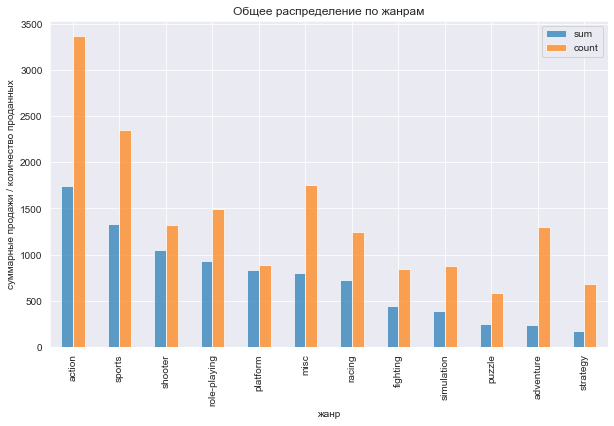

In [58]:
#посмотрим на гистограме как выглядит распределение

sns.set_style('darkgrid')

data_games_genre.plot(kind='bar', alpha=0.7, figsize=(10,6))

plt.title('Общее распределение по жанрам')
plt.ylabel('суммарные продажи / количество проданных')
plt.xlabel('жанр')
plt.show()


<b>Вывод:</b> 

Если выделять ТОП-3 продаж по жанрам, то это Action, Sports, Shooter Есть и ТОП-5 жанров с низкими продажами: это Strategy,Adventure,Puzzle. Пользователю явно хочется динамики, а стретегически мыслить скучно)) В целом произвродители могут ориентироваться на это при разраотке игр.

### Шаг 4. Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [59]:
#функция для построения круговых диаграмм
def pie_drawing(data,region):
    
    labels=data.index
    fig, ax = plt.subplots()
    
    ax.pie(x=data['ratio'], labels=labels,  autopct='%1.1f%%', normalize=False)
    ax.axis('equal')
    plt.title('Диаграмма долей продаж по {} '.format(region), fontsize=14)
    plt.show()

In [60]:
#NA - Северная Америка

#группировка и сортировка
na_sales = games_good_time.pivot_table(index='platform', values='na_sales', aggfunc='sum', ).sort_values(by='na_sales', ascending=False).iloc[:5]  
            
#отношение продажи по платформе к общей суммарным продажам по региону
na_sales['ratio'] = na_sales['na_sales'] / na_sales['na_sales'].sum()          


na_sales.head()

,na_sales,ratio
platform,,
x360,595.74,0.245568
ps2,572.92,0.236161
wii,486.87,0.200691
ps3,390.13,0.160814
ds,380.31,0.156766


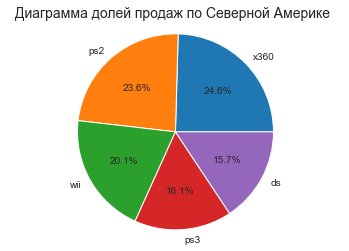

In [61]:
pie_drawing(na_sales, 'Северной Америке')

<b>Вывод:</b>

В Америке хорошо продавалась x360,WII, из линейки PS самая успешная была - PS2. В целом линейка PS теряет рынок, так как из всех версий PS -> PS2 -> PS3 самая успешная по доле рынка была вторая.

In [62]:
#EU - Европейский регион
#группировка и сортировка
eu_sales = games_good_time.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).iloc[:5]  
            
#отношение продажи по платформе к общей суммарным продажам по региону
eu_sales['ratio'] = eu_sales['eu_sales'] / eu_sales['eu_sales'].sum()          

eu_sales.head()

,eu_sales,ratio
platform,,
ps2,332.63,0.237785
ps3,327.21,0.233910
x360,268.32,0.191812
wii,258.32,0.184663
ps,212.39,0.151830


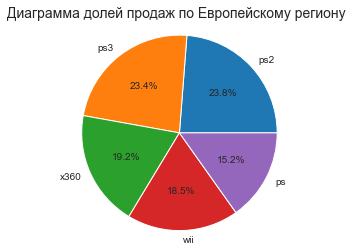

In [63]:
pie_drawing(eu_sales,'Европейскому региону')

<b>Вывод:</b> В Европе хорошо продавались PS2, PS3 и x360. Интерес к PS3 был чуть менее интенсивный, не пользовалась безоговорочной популярностью и x360.

In [64]:
# JP - Япония
#группировка и сортировка
jp_sales = games_good_time.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).iloc[:5]  
            
#отношение продажи по платформе к общей суммарным продажам по региону
jp_sales['ratio'] = jp_sales['jp_sales'] / jp_sales['jp_sales'].sum()          

jp_sales.head()

,jp_sales,ratio
platform,,
ds,175.00,0.263598
ps,139.78,0.210547
ps2,137.54,0.207173
snes,110.95,0.167121
3ds,100.62,0.151561


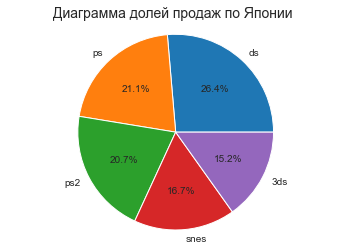

In [65]:
pie_drawing(jp_sales,'Японии')

<b>Вывод:</b> В Японии все иначе, у них лидер по доле рынка - DS. Логично, раработчик - Nintendo, "отечественный" для японцев, имел успех PS и PS2 (в меньшей степени), а вот PS3 уже сильно просела по доле рынка.

#### Самые популярные жанры (топ-5). Поясните разницу.

In [66]:
# NA - Северная Америка

#группировка и сортировка и выделение ТОП-5
na_sales_genre = games_good_time.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).iloc[:5]  
            
#отношение продажи по платформе к общей суммарным продажам по региону
na_sales_genre['ratio'] = na_sales_genre['na_sales'] / na_sales_genre['na_sales'].sum()          

na_sales_genre.head()

,na_sales,ratio
genre,,
action,821.00,0.296718
sports,659.77,0.238448
shooter,533.99,0.192989
misc,396.22,0.143198
platform,355.96,0.128648


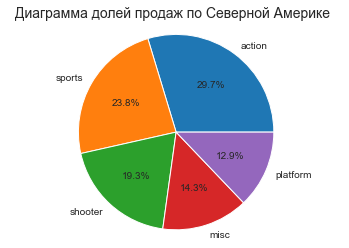

In [67]:
pie_drawing(na_sales_genre,'Северной Америке')

<b>Вывод:</b> В лидерах Action, Sport и Shooter. 

In [68]:
# EU - Европейский регион
#группировка и сортировка
eu_sales_genre = games_good_time.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).iloc[:5] 
            
#отношение продажи по платформе к общей суммарным продажам по региону
eu_sales_genre['ratio'] = eu_sales_genre['eu_sales'] / eu_sales_genre['eu_sales'].sum()          


eu_sales_genre.head()

,eu_sales,ratio
genre,,
action,505.73,0.310643
sports,368.26,0.226203
shooter,311.69,0.191455
racing,231.93,0.142462
misc,210.40,0.129238


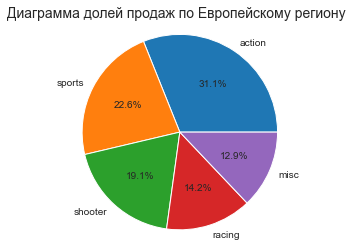

In [69]:
pie_drawing(eu_sales_genre,'Европейскому региону')

<b>Вывод:</b> Точно такая же картина по ТОП-3 как у Америки у европейского пользователя. Логично, близкий "западный" менталитет.

In [70]:
# JP - Япония
#группировка и сортировка
jp_sales_genre = games_good_time.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).iloc[:5]  
            
#отношение продажи по платформе к общей суммарным продажам по региону
jp_sales_genre['ratio'] = jp_sales_genre['jp_sales'] / jp_sales_genre['jp_sales'].sum()          


jp_sales_genre.head()

,jp_sales,ratio
genre,,
role-playing,336.29,0.421047
action,150.82,0.188832
sports,115.45,0.144547
misc,102.16,0.127908
platform,93.98,0.117666


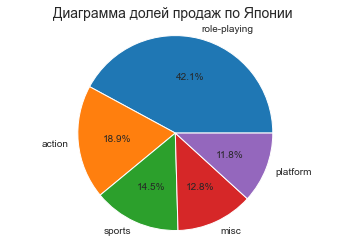

In [71]:
pie_drawing(jp_sales_genre,'Японии')

<b>Вывод:</b> Японцы по своему менталитету сильно отличаются от западного мира, поэтому их любимый жанр role-playing вполне понятен, они любят переодеваться в героев аниме и манги, поэтому этот жанр - их.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

ESRB - рейтинг

    E - Everyone - для всех, для детей от 6 лет.
    T - Teen - игры для подростков старше 13 лет.
    M - Mature - игры для подростков, старше 17 лет.
    E10+ - Everyone 10 and older - для всех, старше 10 лет.
    EC - Early Childhood - для детей от 3 лет.
    RP - Rating Pending - рейтинг еще не присвоен, зачастую это игры добавленные сразу после презентации.
    AO - Adults Only 18+ - только для взрослых, старше 18 лет.


In [72]:
# NA - Северная Америка
#группировка и сортировка
esrb_na_sales = games_good_time[(games_good_time['rating'] !='no raiting')].pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).iloc[:5]  
            
#отношение продажи по платформе к общей суммарным продажам по региону
esrb_na_sales['ratio'] = esrb_na_sales['na_sales'] / esrb_na_sales['na_sales'].sum()          

esrb_na_sales.head()

,na_sales,ratio
rating,,
e,1276.80,0.409977
t,747.60,0.240052
m,742.89,0.238540
e10+,345.50,0.110939
ec,1.53,0.000491


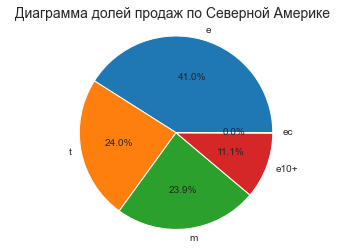

In [73]:
pie_drawing(esrb_na_sales,'Северной Америке')

<b>Вывод:</b> Превалирует рейтинг E -  Everyone - для всех. На втором и третьем месте T - Teen - игры для подростков от 13 и старше 17.

In [74]:
# EU - Европейский регион
#группировка и сортировка
esrb_eu_sales = games_good_time[(games_good_time['rating'] !='no raiting')].pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).iloc[:5]  
            
#отношение продажи по платформе к общей суммарным продажам по региону
esrb_eu_sales['ratio'] = esrb_eu_sales['eu_sales'] / esrb_eu_sales['eu_sales'].sum()          

esrb_eu_sales.head()

,eu_sales,ratio
rating,,
e,704.14,0.393409
m,480.00,0.268180
t,421.76,0.235641
e10+,183.33,0.102428
ao,0.61,0.000341


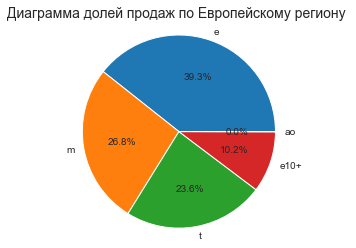

In [75]:
pie_drawing(esrb_eu_sales,'Европейскому региону')

<b>Вывод:</b> Аналогичная картина как в Америке и для Европы: в лидерах рейтинг E -  Everyone - для всех. На втором месте, правда, игры для тех, кому больше 17.

In [76]:
# JP - Япония
#группировка и сортировка
esrb_jp_sales = games_good_time[(games_good_time['rating'] !='no raiting')].pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).iloc[:5]  
            
#отношение продажи по платформе к общей суммарным продажам по региону
esrb_jp_sales['ratio'] = esrb_jp_sales['jp_sales'] / esrb_jp_sales['jp_sales'].sum()          

esrb_jp_sales.head()

,jp_sales,ratio
rating,,
e,199.42,0.439348
t,150.70,0.332011
m,63.58,0.140075
e10+,40.20,0.088566
ao,0.00,0.000000


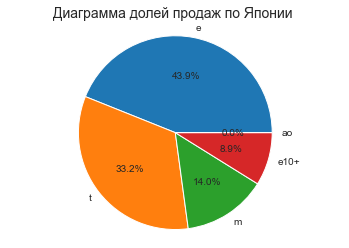

In [77]:
pie_drawing(esrb_jp_sales,'Японии')

<b>Вывод:</b> Картина похожа, но доля "для всех" самая большая по регионам. И самая маленькая доля игр для подростков старше 17. Японцы очень дисциплинированы и возможно в этом возрасте готовятся к экзаменам и им не до игр? 

### Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Так как в гипотезах присуствует проверка средних был выбран метод ttest_ind, который вычисляет T-тест для средних двух независимых выборок баллов. Это двусторонний тест для нулевой гипотезы о том, что две независимые выборки имеют идентичные средние (ожидаемые) значения.

При выборе критического уровня значимости учитывается объем выборки.  При малом объеме выборки более вероятно получить случайный результат. Следовательно, можно взять большую вероятность ошибки первого рода. Возьмем уровень критической значимости 0.05


<b> Нулевая гипотеза H0 </b> - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<b> Альтернативная гипотеза H1 </b>- Средние пользовательские рейтинги отличаются


In [78]:
#выделяем таблицу c платформой Xbox One,убирая из нее сделанную замену
data_games_xone=data_games[((data_games['platform'] == 'xone') & (data_games['year_of_release'] >= 1991) & (data_games['user_score'] != -1))]
xone_mean=data_games_xone.pivot_table(index='name', values='user_score', aggfunc='mean')

#выделяем таблицу c платформой PC,убирая из нее сделанную замену
data_games_pc=data_games[((data_games['platform'] == 'pc') & (data_games['year_of_release'] >= 1991) & (data_games['user_score'] != -1))]
pc_mean=data_games_pc.pivot_table(index='name', values='user_score', aggfunc='mean')

In [79]:
#вычислим дисперсию
print('Дисперсия оценок пользователей выборки Action:', data_games_xone['user_score'].var())
print('Дисперсия оценок пользователей выборки Sports:', data_games_pc['user_score'].var())

Дисперсия оценок пользователей выборки Action: 1.9069968429360702
Дисперсия оценок пользователей выборки Sports: 2.3139231414330785


Так как дисперсии для выборок сильно отличаются, то небоходимо учесть это в функции ttest_ind, добавив аргумент equal_var=False

In [80]:
#проверяем первую гипотезу 

alpha = .05
results = st.ttest_ind(xone_mean, pc_mean,equal_var=False)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [3.82294769e-06]
Отвергаем нулевую гипотезу


In [81]:
#посмотрим что на самом деле
print(pc_mean['user_score'].mean()) 
print(xone_mean['user_score'].mean()) 

7.06857887874838
6.521428571428572


Действительно, средние почти одинаковые.

<b> Нулевая гипотеза H0 </b>- Средние пользовательские рейтинги жанров Action и Sports одинаковые.

<b> Альтернативная гипотеза H1 </b>- Средние пользовательские рейтинги отличаются

Дисперсия близка друг к другу

In [82]:

#выделяем таблицу c жанром Action,убирая из нее сделанную замену
data_games_action=data_games[((data_games['genre'] == 'action') & (data_games['year_of_release'] >= 1991) & (data_games['genre'] !='no genre'))]
action_mean=data_games_action.pivot_table(index='name', values='user_score')

#выделяем таблицу c жанром Sports,убирая из нее сделанную замену
data_games_sports=data_games[((data_games['genre'] == 'sports') & (data_games['year_of_release'] >= 1991) & (data_games['genre'] != 'no genre'))]
sports_mean=data_games_sports.pivot_table(index='name', values='user_score')

In [83]:
#вычислим дисперсию
print('Дисперсия оценок пользователей выборки Action:', data_games_action['user_score'].var())
print('Дисперсия оценок пользователей выборки Sports:', data_games_sports['user_score'].var())

Дисперсия оценок пользователей выборки Action: 17.15518934020338
Дисперсия оценок пользователей выборки Sports: 17.045241607447657


In [84]:
#проверяем вторую гипотезу 
# H0=Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

alpha = .05
results = st.ttest_ind(action_mean, sports_mean)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [3.77624278e-09]
Отвергаем нулевую гипотезу


In [85]:
#посмотрим что на самом деле
print(action_mean['user_score'].mean()) 
print(sports_mean['user_score'].mean()) 

2.6574807669720495
1.8385910360707873


Действительно, средние отличаются.

<b> Вывод: <b/>  
    
После проверки гипотез было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports отличаются.

### Шаг 6. Напишите общий вывод

1. Были изучены данные по таблице, содержащей информацию о продажах компьютерных игр в разных регионах, проверено наличие пропущенных значений, дубликатов, неверных типов данных.

В результате была выполнена предподготовка, в рамках которой:
- обработан регистр заголовков таблицы;
- строковые данные в столбцах таблице приведены к нижнему регистру; 
- проведена обработка пропусков:

  так как пропусков оказалось  некоторых столбцах >10% принято решение заменить их на значения «маркеры», которые можно «увидеть» и исключить в процессе анализа.
  
   - в year_of_release  на 2222;
   - в name, genre, rating на ‘no name’, ‘no genre’,’no rating’ соответственно;
   -выяснено, что значение tbd в столбце user_score -  по факту тот же пропуск, он заменен на -1, так же как и присутствующие пропуски в этом столбце;
   -в столбце rating  выявлен скрытый дубликат, устаревшая категория K-A, заменена на E;
   -в столбце critic_score пропуск заменен на 0.
   
- рассчитаны и добавлены в таблицу суммарные по всем регионам.

2. Произведен исследовательский анализ данных, в рамках которого определено, что для анализа интересны годы с 1991 по 2016, так как раньше 1991 было чрезвычайно мало продаж, рынок только начал развиваться. Были выявлены платформы-лидеры по суммарным продажам: PS2,X360,PS3,WII,DS,PS. Для них построено распределение по годам, выявлено, что они существовали около 10 лет, а в среднем платформы «живут» около 5 лет.
Исходя из величины жизненного цикла платформы был выявлен актуальный период – с 2011 до 2016 года, проанализированы платформы, которые на конец 2015 демонстрировали рост: X360,3DS,PS3 и платформы-аутсайдеры с низкими продажами и слабой динамикой (PSV).
Выявлено, что в ТОП-6 по продажам присутствуют различные версии платформы PS, самой успешной среди которых была PS3. В целом по анализу боксплотов PS3 и X360 наиболее прибыльные в ТОП-6.

3. Оценена зависимость между продажами, оценками пользователей и критиков. Зависимость есть, но слабая. Установлен всплеск зависимости по платформе PS3. Сделано предположение, что после успеха PS2 пользователи тщательно изучали информацию о новой версии.


4. По жанрам выявлены ТОП-3 популярных: Action, Sports, Shooter и 3 наименее популярных: Strategy, Adventure, Puzzle. Пользователи предпочитают «активные» и динамичные игры.


5. По продажам по регионам Европа и Америка схожи в выборе платформ, а Япония идет своим особым путем и выбирает «отечественную» платформу DS. Тоже самое наблюдается при анализе жанров, которые предпочитают пользователи в разных странах. В Америке и Европе все те же ТОП-3: Action, Sports, Shooter. Японцы, любящие переодеваться в героев аниме и манги предпочитают role-playing. 


6. Интересная ситуация с категориями игр. В Америке и Европе опять схожая картина: большие доли имеют E(для всех), T(подростки от 13 лет) и M(подростки 17+). В Японии «проседает» категория M, сделано предположение, что чрезвычайно ответственные японские подростки в 17 лет вместе игр учат уроки, чтобы сдать экзамены.


7. Так же проверены гипотезы и установлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports отличаются.


8. В целом можно сказать, что при выборе стратегии рекламы компьютерных игр производителю нужно обращать внимание на географическое положение рынка, японский рынок сильно отличается по предпочтениям от Европы и Америки, несущественные различия присутствуют и между последними. 


